In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
sequence=np.array([i for i in range(1,101)])
window_size=3
X=[]
Y=[]

In [3]:
for i in range(len(sequence)-window_size):
    X.append(sequence[i:i+window_size])
    Y.append(sequence[i+window_size])


In [4]:
X=np.array(X)
Y=np.array(Y)

In [5]:
X=X.reshape((X.shape[0],X.shape[1],1))

In [9]:
model=Sequential()
model.add(LSTM(units=32,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [10]:
model.fit(X,Y,epochs=50,verbose=2)
print("training complete")

Epoch 1/50
4/4 - 2s - 475ms/step - loss: 4557.8706
Epoch 2/50
4/4 - 0s - 17ms/step - loss: 4255.2354
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 3983.6733
Epoch 4/50
4/4 - 0s - 12ms/step - loss: 3742.9658
Epoch 5/50
4/4 - 0s - 15ms/step - loss: 3485.7500
Epoch 6/50
4/4 - 0s - 12ms/step - loss: 3218.2671
Epoch 7/50
4/4 - 0s - 12ms/step - loss: 2957.0574
Epoch 8/50
4/4 - 0s - 15ms/step - loss: 2722.5110
Epoch 9/50
4/4 - 0s - 15ms/step - loss: 2498.5317
Epoch 10/50
4/4 - 0s - 15ms/step - loss: 2223.0991
Epoch 11/50
4/4 - 0s - 15ms/step - loss: 1906.9637
Epoch 12/50
4/4 - 0s - 15ms/step - loss: 1617.2731
Epoch 13/50
4/4 - 0s - 13ms/step - loss: 1403.5438
Epoch 14/50
4/4 - 0s - 12ms/step - loss: 1211.8101
Epoch 15/50
4/4 - 0s - 12ms/step - loss: 1013.5338
Epoch 16/50
4/4 - 0s - 15ms/step - loss: 790.5640
Epoch 17/50
4/4 - 0s - 15ms/step - loss: 483.4929
Epoch 18/50
4/4 - 0s - 12ms/step - loss: 110.9896
Epoch 19/50
4/4 - 0s - 16ms/step - loss: 19.7833
Epoch 20/50
4/4 - 0s - 12ms/step - loss: 46.

In [11]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:6.18


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


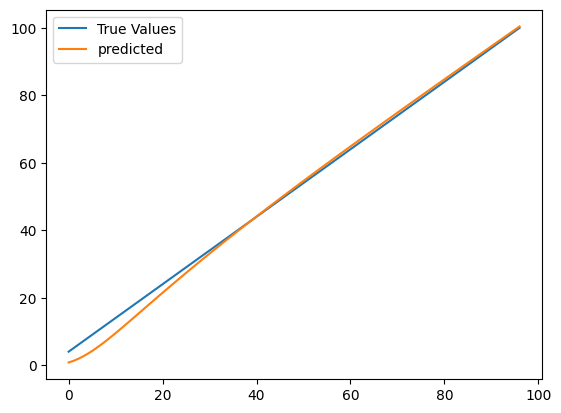

In [12]:
predictions=model.predict(X)
plt.plot(Y,label='True Values')
plt.plot(predictions,label='predicted')
plt.legend()
plt.show()